## Challenge: 

Being able to predict the sales we will have in a given period based on ad spend on the 3 major networks that the company invests in: TV, Newspaper and Radio.

* TV, Newspaper and Radio are in thousands of reais
* Sales are in millions

### Passo a Passo de um Projeto de Ciência de Dados.

Passo 1: Entendimento do Desafio;

Passo 2: Entendimento da Área/Empresa; 

Passo 3: Extração/Obtenção de Dados;

Passo 4: Ajuste de Dados(Tratamento/Limpeza);

Passo 5: Análise exploratória;

Passo 6: Modelagem + Algoritmos;

Passo 7: Interpretação de Resultados;

Passo 8: Deploy/Produção.

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [6]:
#Extração/Obtenção dos dados

import pandas as pd

df = pd.read_csv("advertising.csv")
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [8]:
# Ajustes de Dados (Limpeza de Dados)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


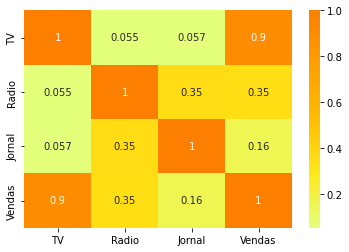

In [9]:
#Análise Exploratória

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap="Wistia")
plt.show()


In [10]:
# Modelagem + Algoritmos
## Separando os dados de treino e de teste

from sklearn.model_selection import train_test_split

y = df["Vendas"]
x = df.drop("Vendas", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [12]:
# Temos um problema de regressão - Devemos escolher os modelos que vamos usar:
# Linear Regression
# RandomForest 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar os modelos
modelo_LinearRegression = LinearRegression()
modelo_RandomForest = RandomForestRegressor()

# Treinar os modelos
modelo_LinearRegression.fit(x_train, y_train)
modelo_RandomForest.fit(x_train, y_train)

RandomForestRegressor()

In [13]:
# Teste da AI e Avaliação do Melhor Modelo

from sklearn import metrics

# Criar as previsoes
previsao_LinearRegression = modelo_LinearRegression.predict(x_test)
previsao_RandomForest = modelo_RandomForest.predict(x_test)

# Comparar os modelos
print(metrics.r2_score(y_test, previsao_LinearRegression))
print(metrics.r2_score(y_test, previsao_RandomForest))  

0.9071151423684273
0.9638821813898026


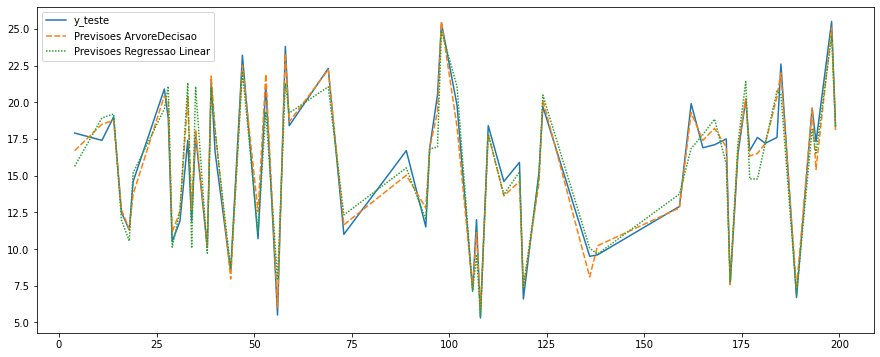

In [14]:
#Interpretação dos Resultados
## Visualização Gráfica das Previsões

df_auxiliar = pd.DataFrame()
df_auxiliar["y_teste"] = y_test
df_auxiliar["Previsoes ArvoreDecisao"] = previsao_RandomForest
df_auxiliar["Previsoes Regressao Linear"] = previsao_LinearRegression

plt.figure(figsize=(15,6))
sns.lineplot(data=df_auxiliar)
plt.show()

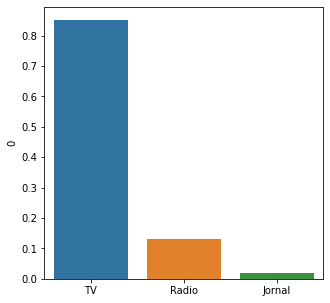

In [22]:
importance_features = pd.DataFrame(modelo_RandomForest.feature_importances_, x_train.columns)
plt.figure(figsize=(5,5))
sns.barplot(x = importance_features.index, y = importance_features[0])
plt.show()

In [19]:
# Deploy

new_df = pd.read_csv("novos.csv")
display(new_df)
predict = modelo_RandomForest.predict(new_df)
print(predict)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.558  8.684 20.059]
